# Chapter 6. 확률

## 6-5. 연속 분포

1. 이산형 분포(Discrete distribution): 각각의 결과에 확률을 계산해주는 분포
2. 연속 분포(Continuous distribution): 연속적인 결과에 대한 분포
        1) 균등분포(uniform distribution): 0과 1 사이의 모든 값에 동등한 비중을 준 분포. 0과 1 사이에는 무한히 많은 숫자가 존재하므로, 숫자 하나의 비중은 0임.


#### 균등분포의 확률밀도함수(probability density function, pdf)
 * 밀도함수를 특정 구간에서 적분한 값으로 확률을 나타냄.
 * 즉, 확률변수의 값이 a~b 사이의 범위에 있을 확률은, 밀도함수 그래프를 a부터 b까지 적분한 결과라는 뜻.

In [8]:
#필요한 라이브러리 미리 호출
from collections import Counter
import math, random
from matplotlib import pyplot as plt

In [5]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

print(uniform_pdf(0.2))
print(uniform_pdf(1.5))

1
0


#### 균등분포의 누적분포함수(cumulative distribution function, cdf)
 * 확률변수의 값이 특정 값보다 작거나 클 확률을 나타냄.

In [6]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1
    
print(uniform_cdf(-2))
print(uniform_cdf(0.7))
print(uniform_cdf(1.3))

0
0.7
1


## 6-6. 정규 분포(Normal distribution)

 1. 정규분포
         1)형태: 종형 곡선 모양의 분포
         2)평균(μ): 종의 중심이 어디인지를 나타냄.
         3)표준편차(σ): 종의 폭이 얼마나 넓은지 나타냄.

0.3910426939754559


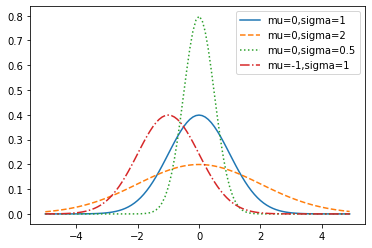

None


In [10]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def plot_normal_pdfs(plt):                   #평균이 다르면 곡선의 중심이 달라짐.
    xs = [x / 10.0 for x in range(-50, 50)] #표준편차가 커질수록 낮고 완만한 곡선.
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()
    
print(normal_pdf(0.2, 0, 1))
print(plot_normal_pdfs(plt))

2. 표준정규분포(Standard normal distribution)
         1) 표준정규분포: μ = 0, σ = 1인 정규분포.
         2) Z가 표준정규분포의 확률변수라면
            X = σZ + μ
            반대로 X가 표준정규분포의 확률변수라면
            Z = (X - μ) / σ
         3) 정규분포의 누적분포함수 구현: math.erf

0.3910426939754559


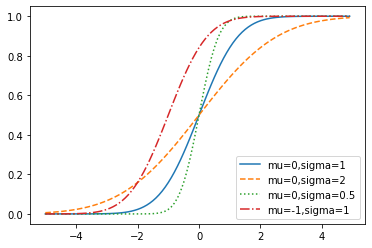

None


In [13]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)] #표준편차가 작을수록 X=0을 중심으로 급격하게 증가함
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()
    

print(normal_pdf(0.2, 0, 1))
print(plot_normal_cdfs(plt))

#### 2-4. 누적분포함수의 역함수
 * 특정 확률을 갖는 확률변수의 값을 찾기 위해.
 * 누적분포함수가 연속 및 증가함수라는 점을 고려하여 Binary search 알고리즘을 사용함.

In [18]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001): #tolerance = 공차 #모든 수가 같은 비중을 둔다는 의미.
    """find approximate inverse using binary search"""

    # 표준정규분포가 아니면 표준정규분포로 변환()
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    #수평축 값의 범위가 -10 ~ 10
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1

    #표준정규분포의 구간을 반복적으로 이등분하되, 원하는 확률값에 가까워질 때까지 계속 나눈다(hi_z - low_z =< tolerance일 때까지)
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

print(inverse_normal_cdf(0.1, 2, 1.5, 0.00001)) #평균 = 2, 표준편차 = 1.5, 공차 = 0.00001일 때 p = 0.1인 확률변수의 값은?
print(inverse_normal_cdf(0.1, 0, 1, 0.00001)) #평균 = 0, 표준편차 = 1, 공차 = 0.00001일 때 p = 0.1인 확률변수의 값은?

0.07766437530517578
-1.2815570831298828


## 6-7. 중심극한정리(Central limit theorem)

1. 중심극한정리: 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 이론.
2. 이항확률변수(Binomial random variable)
      - 베르누이 확률변수(Bernoulli random variable)
           * 결과가 A 혹은 B 두 가지 중 하나로만 나오는 것의 확률변수. 동전던지기는 앞면 / 뒷면의 두 가지 경우만 나오므로 베르누이 시도(Bernoulli tiral)의 일종.
           * 베르누이 시도의 결과를 확률변수(X)로 나타낼 때는 일반적으로 X=1, X=0 또는 X=-1으로 나타낸다. 그리고 베르누이 확률변수의 값은 X=1일 확률 p, 그렇지 않을 확률 1-p로 나타낼 수 있다(이항분포 따름).
           * 이항 확률변수는 시행을 연속하는 횟수 n, 사건이 발생할 확률 p 두 가지로 구성됨. 단순히 n개의 독립적인 베르누이 확률변수를 더한 것이 이항 확률변수.
           * 베르누이 확률변수는 평균 p, 표준편차 √p(1-p) 를 따름.
           * 중심극한정리에 따르면, n이 적당히 크다면 이항 확률변수는 평균이 np, 표준편차가 √np(1-p)인 정규분포의 확률변수와 비슷해짐.

3. 학습에 참고가 될 만한 블로그: https://drhongdatanote.tistory.com/57

In [21]:
#베르누이 시행
def bernoulli_trial(p):                    #random.random(): 0~1 사이의 임의의 실수값
    return 1 if random.random() < p else 0 #random값이 p보다 작으면 1, p보다 크거나 같으면 0

print(bernoulli_trial(0.5))

0


In [32]:
def binomial(p, n):  #n회에 걸친 베르누이 시행에 대한 확률변수들의 합: 1의 개수
    return sum(bernoulli_trial(p) for _ in range(n))

print(binomial(0.75, 10)) #p = 0.75의 확률인 독립적인 시행을 10회 할 때 10회 할 때 베르누이 확률변수의 합 

6


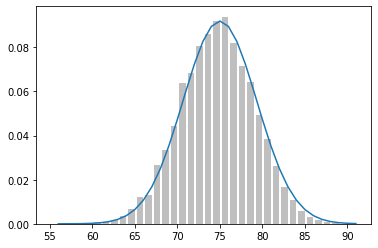

None


In [33]:
def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)] #num_points만큼 binomial(p. n)을 반복

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()
    
print(make_hist(0.75, 100, 10000))
#0.75 확률의 베르누이 시행을 100번씩 반복하는 행위를 10000번 한 결과.
#중심극한정리의 핵심은, 이 히스토그램들을 이은 것이 정규분포의 형태를 띈다는 것이다.
#즉, 특정 확률변수보다 크거나 작을 확률은 그래프의 넓이와 같다.
#ex. X<70일 확률은 55<= X < 70   